# Object Detection with TDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=True, gridlines='--')

#import scipy
from scipy import ndimage

from persim import plot_diagrams
from ripser import ripser, lower_star_img
from sklearn.cluster import KMeans

# My stuff
from utils import *

## Preprocessing

### Version 1 - Just use grayscale

In the future, it would be a good idea to use color in the model.

In [2]:
img_original = plt.imread('../data/testing/pipe_stack.png')

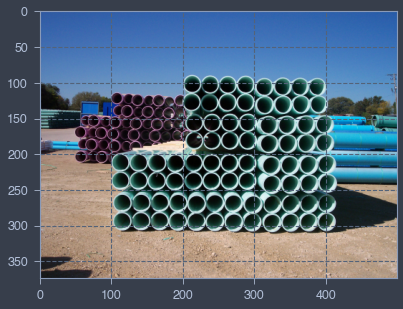

In [3]:
_ = plt.imshow(img_original)

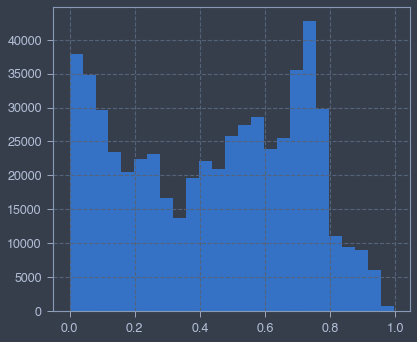

In [4]:
# Values between 0 and 1
_ = plt.hist(img_original.flatten(), bins=25)

In [5]:
# img has RGB values.
img_original.shape

(374, 500, 3)

In [6]:
# Flatten to grayscale using sum
img = img_original.sum(axis=2)
img.shape

(374, 500)

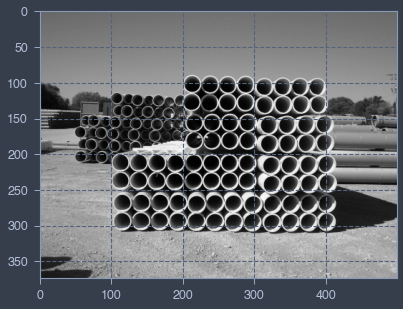

In [7]:
_ = plt.imshow(img, cmap='gray')

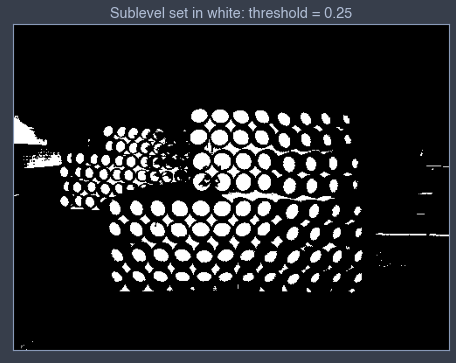

In [8]:
_ = plotSublevelMask(img, threshold=0.25)

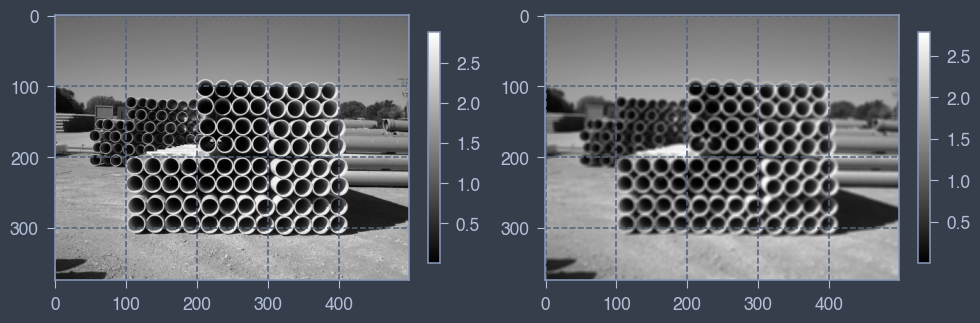

In [14]:
smoothed = ndimage.uniform_filter(img.astype(np.float64), size=5)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 6))
plt.subplot(121)
im = plt.imshow(img, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()

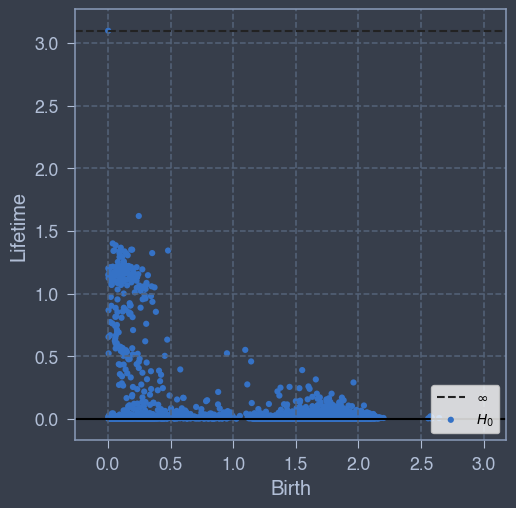

In [26]:
dgm = lower_star_img(smoothed)
plotPersistenceDiagrams(dgm, lifetime=True, colormap='default')

In [27]:
X = np.concatenate([dgm[:, 0].reshape(-1, 1), (dgm[:, 1] - dgm[:, 0]).reshape(-1, 1)], axis=1)
X = X[(np.isinf(X) == False).all(axis=1), :]

In [28]:
model = KMeans().fit(X)

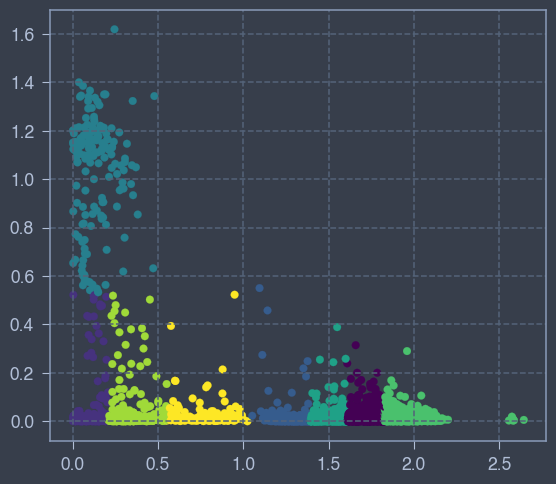

In [29]:
_ = plotKMeansModel(X, model)

In [30]:
idxs = getObjectComponentIndexes(X, model)
components = getObjectComponents(X, model)

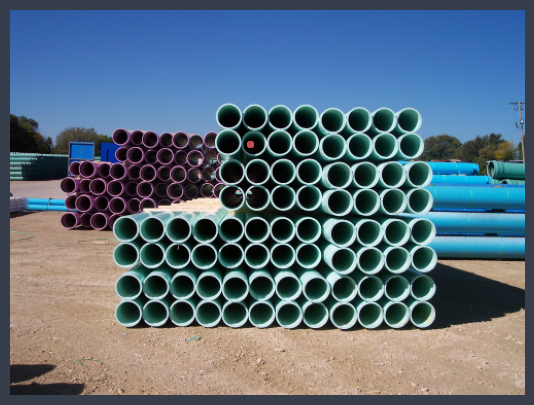

In [32]:
plt.figure(figsize=(8, 5))
plt.imshow(img_original)

X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
bidxs = []

for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    bidxs.append(bidx)
    plt.scatter(X[bidx], Y[bidx], 20, 'r')

_=plt.axis('off')